initialized num of legs = 13
initialized circle number = 2
initialized energy = -1.250000
0
0.005987882614135742
2
0.010973215103149414
4
0.019951581954956055
6
0.026931285858154297
8
0.03191685676574707
10
0.03790116310119629
12
0.04488182067871094
14
0.05385613441467285
16
0.06183600425720215
18
0.06782245635986328
20
0.07380390167236328
22
0.08078765869140625
24
0.0847771167755127
26
0.08976364135742188
28
0.09474945068359375
30
0.10073184967041016
32
0.10671758651733398
34
0.1117238998413086
36
0.11768746376037598
38
0.12466835975646973
40
0.13065409660339355
42
0.13663864135742188
44
0.14162254333496094
46
0.1466083526611328
48
0.15259289741516113
50
0.15857863426208496
52
0.16356706619262695
54
0.1675560474395752
56
0.17453598976135254
58
0.1845090389251709
60
0.19049334526062012
62
0.19747328758239746
64
0.21794366836547852
66
0.2229297161102295
68
0.23290276527404785
70
0.23788976669311523
72
0.24387288093566895
74
0.24985861778259277
76
0.25484395027160645
78
0.261823654174804

2.550724744796753
804
2.554713726043701
806
2.560697555541992
808
2.5666816234588623
810
2.571671485900879
812
2.576655387878418
814
2.5816421508789062
816
2.5866291522979736
818
2.591615915298462
820
2.597599983215332
822
2.603583574295044
824
2.609567642211914
826
2.615433692932129
828
2.620422124862671
830
2.625990867614746
832
2.630979299545288
834
2.63496732711792
836
2.6399545669555664
838
2.6439430713653564
840
2.647932291030884
842
2.6539149284362793
844
2.657905340194702
846
2.6638901233673096
848
2.6688759326934814
850
2.6728670597076416
852
2.6788477897644043
854
2.683837652206421
856
2.6888232231140137
858
2.6958768367767334
860
2.7017884254455566
862
2.7067747116088867
864
2.7127597332000732
866
2.717745542526245
868
2.7227344512939453
870
2.7292332649230957
872
2.7342185974121094
874
2.739205837249756
876
2.7451870441436768
878
2.7511744499206543
880
2.7551627159118652
882
2.7601523399353027
884
2.765137195587158
886
2.7701234817504883
888
2.7751102447509766
890
2.7800955

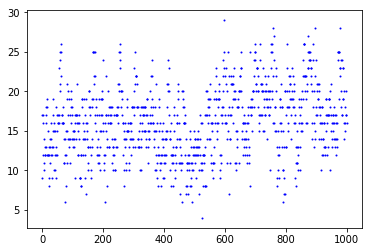

energy=-1.468297
std=0.341076


In [1]:
# debug code, use self.line_index and self.line_y to replace the self.line

import numpy as np
import matplotlib.pyplot as plt
import bisect
import time
import array

global time_circle
global time_update
global time_find
time_circle = 0
time_update = 0
time_find = 0


class SN:   
    # Initialization of the String Net
    def __init__(self,N):
    
        self.M = N
        self.line_index = [[i,i] for i in range(N)]
        self.line_y = [[0,1] for _ in range(N)]
        
        self.stack_leg = [[], N]
        self.stack_circle = [[], N]
        self.leg = [[[i,0],[i,1]] for i in range(N)]
        
        self.pipe_index = [[] for _ in range(N)]
        self.pipe_y = [[] for _ in range(N)]
        
        self.circle_index = [i for i in range(N)]
        self.cn = N
        
        self.pipe_dis = [[] for _ in range(N)]
        
        
    def fn_crmap(self,dis):
        vx = np.array(self.circle_index)
        vx2 = np.hstack((vx[dis:],vx[:dis]))     
        return (vx==vx2).astype('int')
    
    def fn_print(self):
        print('line:')
        print(self.line_index)
        print(self.line_y)
        print('pipe')
        print(self.pipe_index)
        print(self.pipe_y)
        print('circle_index')
        print(self.circle_index)
        print('leg')
        print(self.leg)
        print('stack of leg')
        print(self.stack_leg)
        print('stack of circle')
        print(self.stack_circle)
        print('circle number')
        print(self.cn)
        
    
    def fn_stack_leg_pull(self):
        if not self.stack_leg[0]:
            num_leg = self.stack_leg[1]
            self.stack_leg[1] = num_leg + 1
            # self.leg.append([])
            self.leg.append([[0,0],[0,0],[0,0],[0,0],[0,0]])
        else:
            num_leg = self.stack_leg[0][-1]
            self.stack_leg[0].pop()
        return num_leg

    
    def fn_stack_leg_push(self, index):
        self.stack_leg[0].append(index)
        
        
    def fn_stack_circle_pull(self):
        if not self.stack_circle[0]:
            num_circle = self.stack_circle[1]
            self.stack_circle[1] = num_circle + 1
            self.circle.append([])
        else:
            num_circle = self.stack_circle[0][-1]
            self.stack_circle[0].pop()
        return num_circle
    
    
    def fn_stack_circle_push(self,index):
        self.stack_circle[0].append(index)
        
        
    def fn_generate_poisson(self,beta):
        num_leg = np.random.poisson(beta*self.M)
        v_rand = [np.random.rand()*self.M for _ in range(num_leg)]
        v_pipe = [int(v_rand[i]) for i in range(num_leg)]
        v_y = [v_rand[i] - int(v_rand[i]) for i in range(num_leg)]
        for x in range(num_leg):
            self.pipe_dis[v_pipe[x]].append(v_y[x])
            self.fn_insert_leg(v_pipe[x],v_y[x])
        
        
    def fn_find_nearest(self,line,y):
        index = bisect.bisect_left(self.line_y[line],y)
        if self.line_y[line][index]==y:
            return None
        
        up_ind = self.line_index[line][index-1]
        down_ind = self.line_index[line][index]
        return up_ind, down_ind, index
    
    
    def fn_update_pipe_insert(self,ind,pipe,y):
        if not self.pipe_index[pipe]:
            self.pipe_index[pipe].append(ind)
            self.pipe_y[pipe].append(y)
            return
        
        index = bisect.bisect_left(self.pipe_y[pipe],y)
        
        self.pipe_index[pipe].insert(index,ind)
        self.pipe_y[pipe].insert(index,y)
            
        
    def fn_update_pipe_delete(self,ind):
        pipe = self.leg[ind][0][0]
        y = self.leg[ind][0][1]
        x = bisect.bisect_left(self.pipe_y[pipe],y)
        self.pipe_index[pipe].pop(x)
        self.pipe_y[pipe].pop(x)
            
    
    def fn_insert_leg(self,pipe,y):
        global time_find
        t1 = time.time()
        line1 = pipe
        line2 = (pipe+1)%self.M
        res = self.fn_find_nearest(line1,y)
        if not res:
            return -1
        (left_up,left_down,index1) = res
        res = self.fn_find_nearest(line2,y)
        if not res:
            return -1
        (right_up,right_down,index2) = res
        t2 = time.time()
        time_find = time_find + t2 - t1
        
        new_leg = self.fn_stack_leg_pull()
        
        self.leg[new_leg][0][0] = pipe
        self.leg[new_leg][0][1] = y
        
        
        
        # update the left_up
        if left_up<=self.M-1:
            self.leg[left_up][1][0] = new_leg
            self.leg[left_up][1][1] = 3
            self.leg[new_leg][1][0] = left_up
            self.leg[new_leg][1][1] = 0
        else:
            if self.leg[left_up][0][0]==self.leg[new_leg][0][0]:
                self.leg[left_up][2][0] = new_leg
                self.leg[left_up][2][1] = 3
                self.leg[new_leg][1][0] = left_up
                self.leg[new_leg][1][1] = 4
            else:
                self.leg[left_up][4][0] = new_leg
                self.leg[left_up][4][1] = 3
                self.leg[new_leg][1][0] = left_up
                self.leg[new_leg][1][1] = 2
                
        # update the left_down
        if left_down<=self.M-1:
            self.leg[left_down][0][0] = new_leg
            self.leg[left_down][0][1] = 4
            self.leg[new_leg][2][0] = left_down
            self.leg[new_leg][2][1] = 1
        else:
            if self.leg[left_down][0][0]==self.leg[new_leg][0][0]:
                self.leg[left_down][1][0] = new_leg
                self.leg[left_down][1][1] = 4
                self.leg[new_leg][2][0] = left_down
                self.leg[new_leg][2][1] = 3
            else:
                self.leg[left_down][3][0] = new_leg
                self.leg[left_down][3][1] = 4
                self.leg[new_leg][2][0] = left_down
                self.leg[new_leg][2][1] = 1
                
        # update the right_up
        if right_up<=self.M-1:
            self.leg[right_up][1][0] = new_leg
            self.leg[right_up][1][1] = 1
            self.leg[new_leg][3][0] = right_up
            self.leg[new_leg][3][1] = 0
        else:
            if self.leg[right_up][0][0]==self.leg[new_leg][0][0]:
                self.leg[right_up][4][0] = new_leg
                self.leg[right_up][4][1] = 1
                self.leg[new_leg][3][0] = right_up
                self.leg[new_leg][3][1] = 2
            else:
                self.leg[right_up][2][0] = new_leg
                self.leg[right_up][2][1] = 1
                self.leg[new_leg][3][0] = right_up
                self.leg[new_leg][3][1] = 4
                      
        # update the right_down
        if right_down<=self.M-1:
            self.leg[right_down][0][0] = new_leg
            self.leg[right_down][0][1] = 2
            self.leg[new_leg][4][0] = right_down
            self.leg[new_leg][4][1] = 1
        else:
            if self.leg[right_down][0][0]==self.leg[new_leg][0][0]:
                self.leg[right_down][3][0] = new_leg
                self.leg[right_down][3][1] = 2
                self.leg[new_leg][4][0] = right_down
                self.leg[new_leg][4][1] = 1
            else:
                self.leg[right_down][1][0] = new_leg
                self.leg[right_down][1][1] = 2
                self.leg[new_leg][4][0] = right_down
                self.leg[new_leg][4][1] = 3
         
        
        global time_update
        t1 = time.time()     
        # update the line      
        self.line_index[line1].insert(index1,new_leg)
        self.line_y[line1].insert(index1,y)
        self.line_index[line2].insert(index2,new_leg)
        self.line_y[line2].insert(index2,y)
        t2 = time.time()
        time_update = time_update + t2 - t1
        
        
        global time_circle
        t1 = time.time()
        # begin from the left_up direction:
        v_circle1 = array.array('i',[])
        direction = 1
        ind = new_leg
        while True:
            [ind,direction]=self.leg[ind][direction]
            if ind<=self.M-1:
                v_circle1.append(ind)
            if ind==new_leg:
                break
                
        if direction!=1:
            self.cn = self.cn - 1
            if v_circle1:
                v_circle2 = array.array('i',[])
                direction = 3
                ind = new_leg
                while True:
                    [ind,direction]=self.leg[ind][direction]
                    if ind<=self.M-1:
                        v_circle2.append(ind)
                    if ind==new_leg:
                        break
                
                if v_circle2:
                    if len(v_circle1)>=len(v_circle2):
                        self.fn_stack_circle_push(self.circle_index[v_circle2[0]])
                        circle_index = self.circle_index[v_circle1[0]]
                        for change_index in v_circle2:
                            self.circle_index[change_index] = circle_index
                    else:
                        self.fn_stack_circle_push(self.circle_index[v_circle1[0]])
                        circle_index = self.circle_index[v_circle2[0]]
                        for change_index in v_circle1:
                            self.circle_index[change_index] = circle_index
                        
                                                
        else: # back from the same direction
            self.cn = self.cn + 1
            if v_circle1:
                v_circle2 = array.array('i',[])
                direction = 2
                ind = new_leg
                while True:
                    [ind,direction]=self.leg[ind][direction]
                    if ind<=self.M-1:
                        v_circle2.append(ind)
                    if ind==new_leg:
                        break
                
                if v_circle2:
                    if len(v_circle1)>=len(v_circle2):
                        circle_index = self.fn_stack_circle_pull()
                        for change_index in v_circle2:
                            self.circle_index[change_index] = circle_index
                    else:
                        circle_index = self.fn_stack_circle_pull()
                        for change_index in v_circle1:
                            self.circle_index[change_index] = circle_index
        
        t2 = time.time()
        time_circle = time_circle + t2 - t1
        
        t1 = time.time()
        # update the pipe
        self.fn_update_pipe_insert(new_leg,pipe,y)
        t2 = time.time()
        time_update = time_update + t2 - t1
        
        return new_leg
     
    
    # ====================================================================================================== 
    def fn_delete_leg(self, new_leg):
        pipe = self.leg[new_leg][0][0]
        y = self.leg[new_leg][0][1]
        line1 = pipe
        line2 = (pipe+1)%self.M
        
        
        global time_circle
        t1 = time.time()
        # begin from the left_up direction:
        v_circle1 = array.array('i',[])
        direction = 1
        ind = new_leg
        while True:
            [ind,direction]=self.leg[ind][direction]
            if ind<=self.M-1:
                v_circle1.append(ind)
            if ind==new_leg:
                break
                
        if direction!=1:
            self.cn = self.cn + 1
            if v_circle1:
                v_circle2 = array.array('i',[])
                direction = 3
                ind = new_leg
                
                while True:
                    [ind,direction]=self.leg[ind][direction]
                    if ind<=self.M-1:
                        v_circle2.append(ind)
                    if ind==new_leg:
                        break
                        
                if v_circle2:
                    if len(v_circle1)>=len(v_circle2):
                        circle_index = self.fn_stack_circle_pull()
                        for change_index in v_circle2:
                            self.circle_index[change_index] = circle_index
                    else:
                        circle_index = self.fn_stack_circle_pull()
                        for change_index in v_circle1:
                            self.circle_index[change_index] = circle_index
                            
        else: # back from the same direction
            self.cn = self.cn - 1
            if v_circle1:
                v_circle2 = array.array('i',[])
                direction = 2
                ind = new_leg
                while True:
                    [ind,direction]=self.leg[ind][direction]
                    if ind<=self.M-1:
                        v_circle2.append(ind)
                    if ind==new_leg:
                        break
                
                if v_circle2:
                    if len(v_circle1)>=len(v_circle2):
                        self.fn_stack_circle_push(self.circle_index[v_circle2[0]])
                        circle_index = self.circle_index[v_circle1[0]]
                        for change_index in v_circle2:
                            self.circle_index[change_index] = circle_index
                    else:
                        self.fn_stack_circle_push(self.circle_index[v_circle1[0]])
                        circle_index = self.circle_index[v_circle2[0]]
                        for change_index in v_circle1:
                            self.circle_index[change_index] = circle_index
        
        t2 = time.time()
        time_circle = time_circle + t2 - t1
        
        left_up = self.leg[new_leg][1][0]
        left_down = self.leg[new_leg][2][0]
        right_up = self.leg[new_leg][3][0]
        right_down = self.leg[new_leg][4][0]
        
        # update left_up
        if left_up<=self.M-1:
            self.leg[left_up][1][0] = self.leg[new_leg][2][0]
            self.leg[left_up][1][1] = self.leg[new_leg][2][1]
        else:
            if self.leg[new_leg][0][0]==self.leg[left_up][0][0]:
                self.leg[left_up][2][0] = self.leg[new_leg][2][0]
                self.leg[left_up][2][1] = self.leg[new_leg][2][1]
            else:
                self.leg[left_up][4][0] = self.leg[new_leg][2][0]
                self.leg[left_up][4][1] = self.leg[new_leg][2][1]
                
        # update left_down
        if left_down<=self.M-1:
            self.leg[left_down][0][0] = self.leg[new_leg][1][0]
            self.leg[left_down][0][1] = self.leg[new_leg][1][1]
        else:
            if self.leg[new_leg][0][0]==self.leg[left_down][0][0]:
                self.leg[left_down][1][0] = self.leg[new_leg][1][0]
                self.leg[left_down][1][1] = self.leg[new_leg][1][1]
            else:
                self.leg[left_down][3][0] = self.leg[new_leg][1][0]
                self.leg[left_down][3][1] = self.leg[new_leg][1][1]
        
        # update right_up
        if right_up<=self.M-1:
            self.leg[right_up][1][0] = self.leg[new_leg][4][0]
            self.leg[right_up][1][1] = self.leg[new_leg][4][1]
        else:
            if self.leg[new_leg][0][0]==self.leg[right_up][0][0]:
                self.leg[right_up][4][0] = self.leg[new_leg][4][0]
                self.leg[right_up][4][1] = self.leg[new_leg][4][1]
            else:
                self.leg[right_up][2][0] = self.leg[new_leg][4][0]
                self.leg[right_up][2][1] = self.leg[new_leg][4][1]
        
        # update right_down
        if right_down<=self.M-1:
            self.leg[right_down][0][0] = self.leg[new_leg][3][0]
            self.leg[right_down][0][1] = self.leg[new_leg][3][1]
        else:
            if self.leg[new_leg][0][0]==self.leg[right_down][0][0]:
                self.leg[right_down][3][0] = self.leg[new_leg][3][0]
                self.leg[right_down][3][1] = self.leg[new_leg][3][1]
            else:
                self.leg[right_down][1][0] = self.leg[new_leg][3][0]
                self.leg[right_down][1][1] = self.leg[new_leg][3][1]
                
        
        global time_update
        t1 = time.time()
        # update the pipe
        self.fn_update_pipe_delete(new_leg)
        
        # update the line
        x = bisect.bisect_left(self.line_y[line1],y)
        self.line_index[line1].pop(x)
        self.line_y[line1].pop(x)
        x = bisect.bisect_left(self.line_y[line2],y)
        self.line_index[line2].pop(x)
        self.line_y[line2].pop(x)
        
        t2 = time.time()
        time_update = time_update + t2 - t1
        
        # update stack of pipe
        self.fn_stack_leg_push(new_leg)
        
        return pipe, y
        
        
 
    # =======================================================================
    # =================    Virsualization    ================================
    # =======================================================================
    def fn_virsual_leg(self):
        
        for k in range(1,self.M+1):
            plt.plot((k,k),(-0.25,1.25),'y--')  
        for x in range(len(self.leg)):
    
            if len(self.leg[x])==5 and (not x in self.stack_leg[0]):
                pipe = self.leg[x][0][0]
                y = 1 - self.leg[x][0][1]
                if pipe<=self.M-2:
                    plt.plot([pipe+1,pipe+2],[y,y],color='r',linewidth=0.5)
                else:
                    plt.plot([pipe+1,pipe+1.5],[y,y],color='r',linewidth=0.5)
                    plt.plot([0.5,1],[y,y],color='r',linewidth=0.5)
        
        plt.show()
        
        

# ================================================================================================
# ================================================================================================
# ================================================================================================
# ================================================================================================
# ================================================================================================


# metropolis

import numpy as np
import copy
import matplotlib.pyplot as plt
import time

time_start = time.time()

time_back = 0
num_back = 0

N = 4
beta = 4

#=========== initialization ========================= 
sn = SN(N)
num_leg = np.random.poisson(beta*N)
print('initialized num of legs = %d' %(num_leg))
v_rand = [np.random.rand()*N for i in range(N)]
v_pipe = [int(v_rand[i]) for i in range(N)]
v_y = [v_rand[i]-int(v_rand[i]) for i in range(N)]

for k in range(len(v_y)):
    res = sn.fn_insert_leg(v_pipe[k],v_y[k])
    if res==-1:
        print('dangerous')

print('initialized circle number = %d' %(sn.cn))
res_crmap = sn.fn_crmap(1) 
energy0 = -3/2*sum(res_crmap)/N - 1/2
print('initialized energy = %f' %(energy0))
#====================================================

num_ite = 1000
update_leg_num = beta
num_tot_step = num_ite*N

v_plot_circle = []
c_energy = np.zeros(num_ite*N*update_leg_num)
point = 0
num_jump = 0
num_no_jump = 0
for i_ite in range(num_ite):
    if i_ite%2 == 0:
        print('===========================')
        print(i_ite)
        time_here = time.time()
        print(time_here-time_start)
        
    for k in range(N):
        
        # print(k)
        
        k_random = k          
        for tind in range(update_leg_num):
            
            circle0 = sn.cn
            
            region1 = tind/update_leg_num
            region2 = (tind+1)/update_leg_num
            v_delete = [sn.pipe_index[k_random][i] for i in range(len(sn.pipe_index[k_random])) \
                        if sn.pipe_y[k_random][i]>region1 and sn.pipe_y[k_random][i]<=region2]
            
            v_delete_store = [] # the information of deleted legs
                                # with the (pipe,y)
            for a in v_delete:
                v_delete_store.append(sn.fn_delete_leg(a))
               
            num_add = np.random.poisson(beta/update_leg_num)
            v_add = np.random.rand(num_add)/update_leg_num + region1
            v_add_store = []    # the information of the added legs
                                # with the leg index
            for k2 in range(len(v_add)):
                y = v_add[k2]
                while True:
                    res = sn.fn_insert_leg(k_random,y)
                    if res!=-1:
                        v_add_store.append(res)
                        break
                    else:
                        print('dangerous')
                        break
                 
            if (not v_add_store) and (not v_delete_store):
                num_jump = num_jump + 1
                # v_energy_local_local[tind] = energy0
                c_energy[point] = energy0
                point = point + 1
            else:
                circle1 = sn.cn
                if circle1>=circle0:
                    num_jump = num_jump + 1
                    res_crmap = sn.fn_crmap(1) 
                    energy0 = -3/2*sum(res_crmap)/N - 1/2
                    c_energy[point] = energy0
                    point = point + 1      
                else:
                    if np.random.rand()<2**(circle1-circle0):       
                        # print('Jump ============')
                        num_jump = num_jump + 1
                        res_crmap = sn.fn_crmap(1) 
                        energy0 = -3/2*sum(res_crmap)/N - 1/2
                    
                        c_energy[point] = energy0
                        point = point + 1   
                    else:
                        # print('not jump')
                        num_no_jump = num_no_jump + 1
                        for leg_ind in v_add_store:
                            sn.fn_delete_leg(leg_ind)

                        for pipe_y in v_delete_store:
                            sn.fn_insert_leg(pipe_y[0],pipe_y[1])
                    
                        c_energy[point] = energy0
                        point = point + 1
                       
    v_plot_circle.append(sn.cn)
    

time_end = time.time()           

print('jump rate=%f %%' %(100*num_jump/(num_jump + num_no_jump)))
print('time_all=%f' %(time_end - time_start))
print('time_circle=',time_circle)
print('time_update=', time_update)
print('time_find=', time_find)

print()
plt.scatter([x for x in range(len(v_plot_circle))],v_plot_circle,c='b',s=1)
# plt.scatter(np.arange(len(c_energy)),c_energy,c='b',s=1)
plt.show()
v_e = c_energy[int(point/2):]
print('energy=%f' %(np.mean(v_e)))
print('std=%f' %(np.std(v_e)))



In [3]:
23/36

0.6388888888888888

In [10]:
18/32

0.5625

In [ ]:
import numpy as np
import multiprocessing as mp
import time
import pickle
import os
import sys
import matplotlib.pyplot as plt
import bisect
import array


# =================== global variables =========================
# global variable path
# MY_PATH = "/public1/home/pg2665/ycyu/python/datas/"
MY_PATH = "E:/python/pythondata/StringNet/"
FILE_HEADER = "StringNet"
# inputs from the command line
# JOB_NAME = sys.argv[0]
# NODE_NAME = sys.argv[1]
# NUM_SITE = sys.argv[2]
# TEMP = sys.argv[3]
# NUM_ITE = sys.argv[4]

JOB_NAME = 'test'
NODE_NAME = 'test'
NUM_SITE = 1000
TEMP = 10
NUM_ITE = 10
# the total number of the pools
NUM_POOL = 4

# resolve the input data
NUM_SITE = int(NUM_SITE)
BETA = int(TEMP)
NUM_ITE = int(NUM_ITE)

# the total number of the thread
NUM_THREAD = 4
# Num0 = 1000
# Num_iteration = 200


# ==================   The StringNet class    ===========================
class SN:

    # Initialization of the String Net
    def __init__(self, n):

        self.M = n
        self.line_index = [[i, i] for i in range(n)]
        self.line_y = [[0, 1] for _ in range(n)]
        self.stack_leg = [[], n]
        self.stack_circle = [[], n]
        self.leg = [[[i, 0], [i, 1]] for i in range(n)]
        self.pipe_index = [[] for _ in range(n)]
        self.pipe_y = [[] for _ in range(n)]
        self.circle_index = [i for i in range(n)]
        self.cn = n
        self.pipe_dis = [[] for _ in range(n)]

    def fn_crmap(self, dis):
        vx = np.array(self.circle_index)
        vx2 = np.hstack((vx[dis:], vx[:dis]))
        return (vx == vx2).astype('int')

    def fn_print(self):
        print('line:')
        print(self.line_index)
        print(self.line_y)
        print('pipe')
        print(self.pipe_index)
        print(self.pipe_y)
        print('circle_index')
        print(self.circle_index)
        print('leg')
        print(self.leg)
        print('stack of leg')
        print(self.stack_leg)
        print('stack of circle')
        print(self.stack_circle)
        print('circle number')
        print(self.cn)

    def fn_stack_leg_pull(self):
        if not self.stack_leg[0]:
            num_leg = self.stack_leg[1]
            self.stack_leg[1] = num_leg + 1
            # self.leg.append([])
            self.leg.append([[0, 0], [0, 0], [0, 0], [0, 0], [0, 0]])
        else:
            num_leg = self.stack_leg[0][-1]
            self.stack_leg[0].pop()
        return num_leg

    def fn_stack_leg_push(self, index):
        self.stack_leg[0].append(index)

    def fn_stack_circle_pull(self):
        if not self.stack_circle[0]:
            num_circle = self.stack_circle[1]
            self.stack_circle[1] = num_circle + 1
        else:
            num_circle = self.stack_circle[0][-1]
            self.stack_circle[0].pop()
        return num_circle

    def fn_stack_circle_push(self, index):
        self.stack_circle[0].append(index)

    def fn_generate_poisson(self, beta):
        num_leg = np.random.poisson(beta * self.M)
        v_rand = [np.random.rand() * self.M for _ in range(num_leg)]
        v_pipe = [int(v_rand[i]) for i in range(num_leg)]
        v_y = [v_rand[i] - int(v_rand[i]) for i in range(num_leg)]
        for x in range(num_leg):
            self.pipe_dis[v_pipe[x]].append(v_y[x])
            self.fn_insert_leg(v_pipe[x], v_y[x])

    def fn_find_nearest(self, line, y):
        index = bisect.bisect_left(self.line_y[line], y)
        if self.line_y[line][index] == y:
            return None

        up_ind = self.line_index[line][index - 1]
        down_ind = self.line_index[line][index]
        return up_ind, down_ind, index

    def fn_update_pipe_insert(self, ind, pipe, y):
        if not self.pipe_index[pipe]:
            self.pipe_index[pipe].append(ind)
            self.pipe_y[pipe].append(y)
            return

        index = bisect.bisect_left(self.pipe_y[pipe], y)

        self.pipe_index[pipe].insert(index, ind)
        self.pipe_y[pipe].insert(index, y)

    def fn_update_pipe_delete(self, ind):
        pipe = self.leg[ind][0][0]
        y = self.leg[ind][0][1]
        x = bisect.bisect_left(self.pipe_y[pipe], y)
        self.pipe_index[pipe].pop(x)
        self.pipe_y[pipe].pop(x)

    def fn_insert_leg(self, pipe, y):
        line1 = pipe
        line2 = (pipe + 1) % self.M
        res = self.fn_find_nearest(line1, y)
        if not res:
            return -1
        (left_up, left_down, index1) = res
        res = self.fn_find_nearest(line2, y)
        if not res:
            return -1
        (right_up, right_down, index2) = res

        new_leg = self.fn_stack_leg_pull()

        self.leg[new_leg][0][0] = pipe
        self.leg[new_leg][0][1] = y

        # update the left_up
        if left_up <= self.M - 1:
            self.leg[left_up][1][0] = new_leg
            self.leg[left_up][1][1] = 3
            self.leg[new_leg][1][0] = left_up
            self.leg[new_leg][1][1] = 0
        else:
            if self.leg[left_up][0][0] == self.leg[new_leg][0][0]:
                self.leg[left_up][2][0] = new_leg
                self.leg[left_up][2][1] = 3
                self.leg[new_leg][1][0] = left_up
                self.leg[new_leg][1][1] = 4
            else:
                self.leg[left_up][4][0] = new_leg
                self.leg[left_up][4][1] = 3
                self.leg[new_leg][1][0] = left_up
                self.leg[new_leg][1][1] = 2

        # update the left_down
        if left_down <= self.M - 1:
            self.leg[left_down][0][0] = new_leg
            self.leg[left_down][0][1] = 4
            self.leg[new_leg][2][0] = left_down
            self.leg[new_leg][2][1] = 1
        else:
            if self.leg[left_down][0][0] == self.leg[new_leg][0][0]:
                self.leg[left_down][1][0] = new_leg
                self.leg[left_down][1][1] = 4
                self.leg[new_leg][2][0] = left_down
                self.leg[new_leg][2][1] = 3
            else:
                self.leg[left_down][3][0] = new_leg
                self.leg[left_down][3][1] = 4
                self.leg[new_leg][2][0] = left_down
                self.leg[new_leg][2][1] = 1

        # update the right_up
        if right_up <= self.M - 1:
            self.leg[right_up][1][0] = new_leg
            self.leg[right_up][1][1] = 1
            self.leg[new_leg][3][0] = right_up
            self.leg[new_leg][3][1] = 0
        else:
            if self.leg[right_up][0][0] == self.leg[new_leg][0][0]:
                self.leg[right_up][4][0] = new_leg
                self.leg[right_up][4][1] = 1
                self.leg[new_leg][3][0] = right_up
                self.leg[new_leg][3][1] = 2
            else:
                self.leg[right_up][2][0] = new_leg
                self.leg[right_up][2][1] = 1
                self.leg[new_leg][3][0] = right_up
                self.leg[new_leg][3][1] = 4

        # update the right_down
        if right_down <= self.M - 1:
            self.leg[right_down][0][0] = new_leg
            self.leg[right_down][0][1] = 2
            self.leg[new_leg][4][0] = right_down
            self.leg[new_leg][4][1] = 1
        else:
            if self.leg[right_down][0][0] == self.leg[new_leg][0][0]:
                self.leg[right_down][3][0] = new_leg
                self.leg[right_down][3][1] = 2
                self.leg[new_leg][4][0] = right_down
                self.leg[new_leg][4][1] = 1
            else:
                self.leg[right_down][1][0] = new_leg
                self.leg[right_down][1][1] = 2
                self.leg[new_leg][4][0] = right_down
                self.leg[new_leg][4][1] = 3

        # update the line
        self.line_index[line1].insert(index1, new_leg)
        self.line_y[line1].insert(index1, y)
        self.line_index[line2].insert(index2, new_leg)
        self.line_y[line2].insert(index2, y)

        # begin from the left_up direction:
        v_circle1 = array.array('i', [])
        direction = 1
        ind = new_leg
        while True:
            [ind, direction] = self.leg[ind][direction]
            if ind <= self.M - 1:
                v_circle1.append(ind)
            if ind == new_leg:
                break

        if direction != 1:
            self.cn = self.cn - 1
            if v_circle1:
                v_circle2 = array.array('i', [])
                direction = 3
                ind = new_leg
                while True:
                    [ind, direction] = self.leg[ind][direction]
                    if ind <= self.M - 1:
                        v_circle2.append(ind)
                    if ind == new_leg:
                        break

                if v_circle2:
                    if len(v_circle1) >= len(v_circle2):
                        self.fn_stack_circle_push(self.circle_index[v_circle2[0]])
                        circle_index = self.circle_index[v_circle1[0]]
                        for change_index in v_circle2:
                            self.circle_index[change_index] = circle_index
                    else:
                        self.fn_stack_circle_push(self.circle_index[v_circle1[0]])
                        circle_index = self.circle_index[v_circle2[0]]
                        for change_index in v_circle1:
                            self.circle_index[change_index] = circle_index

        else:  # back from the same direction
            self.cn = self.cn + 1
            if v_circle1:
                v_circle2 = array.array('i', [])
                direction = 2
                ind = new_leg
                while True:
                    [ind, direction] = self.leg[ind][direction]
                    if ind <= self.M - 1:
                        v_circle2.append(ind)
                    if ind == new_leg:
                        break

                if v_circle2:
                    if len(v_circle1) >= len(v_circle2):
                        circle_index = self.fn_stack_circle_pull()
                        for change_index in v_circle2:
                            self.circle_index[change_index] = circle_index
                    else:
                        circle_index = self.fn_stack_circle_pull()
                        for change_index in v_circle1:
                            self.circle_index[change_index] = circle_index

        # update the pipe
        self.fn_update_pipe_insert(new_leg, pipe, y)

        return new_leg

    # ======================================================================================================
    def fn_delete_leg(self, new_leg):
        pipe = self.leg[new_leg][0][0]
        y = self.leg[new_leg][0][1]
        line1 = pipe
        line2 = (pipe + 1) % self.M

        # begin from the left_up direction:
        v_circle1 = array.array('i', [])
        direction = 1
        ind = new_leg
        while True:
            [ind, direction] = self.leg[ind][direction]
            if ind <= self.M - 1:
                v_circle1.append(ind)
            if ind == new_leg:
                break

        if direction != 1:
            self.cn = self.cn + 1
            if v_circle1:
                v_circle2 = array.array('i', [])
                direction = 3
                ind = new_leg

                while True:
                    [ind, direction] = self.leg[ind][direction]
                    if ind <= self.M - 1:
                        v_circle2.append(ind)
                    if ind == new_leg:
                        break

                if v_circle2:
                    if len(v_circle1) >= len(v_circle2):
                        circle_index = self.fn_stack_circle_pull()
                        for change_index in v_circle2:
                            self.circle_index[change_index] = circle_index
                    else:
                        circle_index = self.fn_stack_circle_pull()
                        for change_index in v_circle1:
                            self.circle_index[change_index] = circle_index

        else:  # back from the same direction
            self.cn = self.cn - 1
            if v_circle1:
                v_circle2 = array.array('i', [])
                direction = 2
                ind = new_leg
                while True:
                    [ind, direction] = self.leg[ind][direction]
                    if ind <= self.M - 1:
                        v_circle2.append(ind)
                    if ind == new_leg:
                        break

                if v_circle2:
                    if len(v_circle1) >= len(v_circle2):
                        self.fn_stack_circle_push(self.circle_index[v_circle2[0]])
                        circle_index = self.circle_index[v_circle1[0]]
                        for change_index in v_circle2:
                            self.circle_index[change_index] = circle_index
                    else:
                        self.fn_stack_circle_push(self.circle_index[v_circle1[0]])
                        circle_index = self.circle_index[v_circle2[0]]
                        for change_index in v_circle1:
                            self.circle_index[change_index] = circle_index

        left_up = self.leg[new_leg][1][0]
        left_down = self.leg[new_leg][2][0]
        right_up = self.leg[new_leg][3][0]
        right_down = self.leg[new_leg][4][0]

        # update left_up
        if left_up <= self.M - 1:
            self.leg[left_up][1][0] = self.leg[new_leg][2][0]
            self.leg[left_up][1][1] = self.leg[new_leg][2][1]
        else:
            if self.leg[new_leg][0][0] == self.leg[left_up][0][0]:
                self.leg[left_up][2][0] = self.leg[new_leg][2][0]
                self.leg[left_up][2][1] = self.leg[new_leg][2][1]
            else:
                self.leg[left_up][4][0] = self.leg[new_leg][2][0]
                self.leg[left_up][4][1] = self.leg[new_leg][2][1]

        # update left_down
        if left_down <= self.M - 1:
            self.leg[left_down][0][0] = self.leg[new_leg][1][0]
            self.leg[left_down][0][1] = self.leg[new_leg][1][1]
        else:
            if self.leg[new_leg][0][0] == self.leg[left_down][0][0]:
                self.leg[left_down][1][0] = self.leg[new_leg][1][0]
                self.leg[left_down][1][1] = self.leg[new_leg][1][1]
            else:
                self.leg[left_down][3][0] = self.leg[new_leg][1][0]
                self.leg[left_down][3][1] = self.leg[new_leg][1][1]

        # update right_up
        if right_up <= self.M - 1:
            self.leg[right_up][1][0] = self.leg[new_leg][4][0]
            self.leg[right_up][1][1] = self.leg[new_leg][4][1]
        else:
            if self.leg[new_leg][0][0] == self.leg[right_up][0][0]:
                self.leg[right_up][4][0] = self.leg[new_leg][4][0]
                self.leg[right_up][4][1] = self.leg[new_leg][4][1]
            else:
                self.leg[right_up][2][0] = self.leg[new_leg][4][0]
                self.leg[right_up][2][1] = self.leg[new_leg][4][1]

        # update right_down
        if right_down <= self.M - 1:
            self.leg[right_down][0][0] = self.leg[new_leg][3][0]
            self.leg[right_down][0][1] = self.leg[new_leg][3][1]
        else:
            if self.leg[new_leg][0][0] == self.leg[right_down][0][0]:
                self.leg[right_down][3][0] = self.leg[new_leg][3][0]
                self.leg[right_down][3][1] = self.leg[new_leg][3][1]
            else:
                self.leg[right_down][1][0] = self.leg[new_leg][3][0]
                self.leg[right_down][1][1] = self.leg[new_leg][3][1]

        # update the pipe
        self.fn_update_pipe_delete(new_leg)

        # update the line
        x = bisect.bisect_left(self.line_y[line1], y)
        self.line_index[line1].pop(x)
        self.line_y[line1].pop(x)
        x = bisect.bisect_left(self.line_y[line2], y)
        self.line_index[line2].pop(x)
        self.line_y[line2].pop(x)

        # update stack of pipe
        self.fn_stack_leg_push(new_leg)

        return pipe, y

    # =======================================================================
    # =================    Virsual           ================================
    # =======================================================================
    def fn_virsual_leg(self):

        for k in range(1, self.M + 1):
            plt.plot((k, k), (-0.25, 1.25), 'y--')
        for x in range(len(self.leg)):

            if len(self.leg[x]) == 5 and (x not in self.stack_leg[0]):
                pipe = self.leg[x][0][0]
                y = 1 - self.leg[x][0][1]
                if pipe <= self.M - 2:
                    plt.plot([pipe + 1, pipe + 2], [y, y], color='r', linewidth=0.5)
                else:
                    plt.plot([pipe + 1, pipe + 1.5], [y, y], color='r', linewidth=0.5)
                    plt.plot([0.5, 1], [y, y], color='r', linewidth=0.5)

        plt.show()

# ==================   End of the StringNet class    ===========================


# ===================== The thread =========================
def multi_core(n, beta, num_ite):
    # ==========  SET UP the thread  ==============================
    list_parameter = (n, beta, num_ite)
    input_data = [list_parameter + (i2,) for i2 in range(NUM_THREAD)]
    # the running poll
    pool = mp.Pool(NUM_POOL)
    pool.map(my_sn_thread, input_data)

    pool.close()
    pool.join()


def my_sn_thread(input_data):
    time_start = time.time()
    n = input_data[0]
    beta = input_data[1]
    num_ite = input_data[2]
    index = input_data[3]

    # =========== initialization =========================
    sn = SN(n)
    num_leg = np.random.poisson(beta * n)
    print('initialized num of legs =', num_leg)
    v_rand = [np.random.rand() * n for _ in range(n)]
    v_pipe = [int(v_rand[i]) for i in range(n)]
    v_y = [v_rand[i] - int(v_rand[i]) for i in range(n)]

    for k in range(len(v_y)):
        res = sn.fn_insert_leg(v_pipe[k], v_y[k])
        if res == -1:
            print('dangerous')

    print('initialized circle number = ', sn.cn)
    res_cr = sn.fn_crmap(1)
    energy0 = -3 / 2 * sum(res_cr) / n - 1 / 2
    print('initialized energy =', energy0)
    # ====================================================

    update_leg_num = beta
    v_plot_circle = []
    c_energy = np.zeros(num_ite * n * update_leg_num)
    point = 0
    num_jump = 0
    num_no_jump = 0
    for i_ite in range(num_ite):
        if i_ite % 2 == 0:
            print('===========================')
            print('The %dth thread in the %dth iteration' % (index, i_ite))
            time_here = time.time()
            print('Lapse time: %f' % (time_here - time_start))

        for k in range(n):

            # print(k)
            k_random = k
            for ind2 in range(update_leg_num):
                circle0 = sn.cn
                region1 = ind2 / update_leg_num
                region2 = (ind2 + 1) / update_leg_num
                v_delete = [sn.pipe_index[k_random][i] for i in range(len(sn.pipe_index[k_random]))
                            if region1 < sn.pipe_y[k_random][i] <= region2]

                v_delete_store = []  # the information of deleted legs
                # with the (pipe,y)
                for a in v_delete:
                    v_delete_store.append(sn.fn_delete_leg(a))

                num_add = np.random.poisson(beta / update_leg_num)
                v_add = np.random.rand(num_add) / update_leg_num + region1
                v_add_store = []  # the information of the added legs
                # with the leg index
                for k2 in range(len(v_add)):
                    y = v_add[k2]
                    while True:
                        res = sn.fn_insert_leg(k_random, y)
                        if res != -1:
                            v_add_store.append(res)
                            break
                        else:
                            print('dangerous')
                            break

                if (not v_add_store) and (not v_delete_store):
                    num_jump = num_jump + 1
                    c_energy[point] = energy0
                    point = point + 1
                else:
                    circle1 = sn.cn
                    if circle1 >= circle0:
                        num_jump = num_jump + 1
                        res_cr = sn.fn_crmap(1)
                        energy0 = -3 / 2 * sum(res_cr) / n - 1 / 2
                        c_energy[point] = energy0
                        point = point + 1
                    else:
                        if np.random.rand() < 2 ** (circle1 - circle0):
                            # print('Jump ============')
                            num_jump = num_jump + 1
                            res_cr = sn.fn_crmap(1)
                            energy0 = -3 / 2 * sum(res_cr) / n - 1 / 2

                            c_energy[point] = energy0
                            point = point + 1
                        else:
                            # print('not jump')
                            num_no_jump = num_no_jump + 1
                            for leg_ind in v_add_store:
                                sn.fn_delete_leg(leg_ind)

                            for pipe_y in v_delete_store:
                                sn.fn_insert_leg(pipe_y[0], pipe_y[1])

                            c_energy[point] = energy0
                            point = point + 1

        v_plot_circle.append(sn.cn)

    time_end = time.time()

    print('jump rate=%f %%' % (100 * num_jump / (num_jump + num_no_jump)))
    print('time_all=%f' % (time_end - time_start))

    #   ==========   restore the result  =====================
    data_store = [c_energy, v_plot_circle, input_data]
    # thread_data_name_full = MY_PATH + FILE_HEADER + '_FULL_' + str(index)  # pickle it into the root
    thread_data_name = MY_PATH + FILE_HEADER + '_' + NODE_NAME + '_th_' + str(index)
    with open(thread_data_name, 'wb') as File:
        pickle.dump(data_store, File)

    time_end = time.time()
    print('The thread ' + str(index) + ' takes '
          + str(time_end - time_start) + ' seconds')


# =============       MAIN     ===================================================
if __name__ == '__main__':
    st0 = time.time()
    print(JOB_NAME)
    print(NODE_NAME)

    # =====  create the directory and file in cloud to store datas   ==========
    to_make_dir = MY_PATH
    if os.path.exists(to_make_dir):
        print('The directory %s has already existed' % to_make_dir)
    else:
        print('Try to create the %s' % to_make_dir)
        os.mkdir(to_make_dir)

    multi_core(n=NUM_SITE, beta=BETA, num_ite=NUM_ITE)

    st1 = time.time()
    print('Total main Lapse time = ', st1 - st0)

# ==========    END MAIN     =======================================


test
test
The directory E:/python/pythondata/StringNet/ has already existed


In [ ]:
import numpy as np
import multiprocessing as mp
import time
import pickle
import os
import sys
import matplotlib.pyplot as plt
import bisect
import array


# =================== global variables =========================
# global variable path
# MY_PATH = "/public1/home/pg2665/ycyu/python/datas/"
MY_PATH = "E:/python/pythondata/StringNet/"
FILE_HEADER = "StringNet"
# inputs from the command line
# JOB_NAME = sys.argv[0]
# NODE_NAME = sys.argv[1]
# NUM_SITE = sys.argv[2]
# TEMP = sys.argv[3]
# NUM_ITE = sys.argv[4]

JOB_NAME = 'test'
NODE_NAME = 'test'
NUM_SITE = 1000
TEMP = 10
NUM_ITE = 10
# the total number of the pools
NUM_POOL = 4

# resolve the input data
NUM_SITE = int(NUM_SITE)
BETA = int(TEMP)
NUM_ITE = int(NUM_ITE)

# the total number of the thread
NUM_THREAD = 4
# Num0 = 1000
# Num_iteration = 200


# ==================   The StringNet class    ===========================
class SN:

    # Initialization of the String Net
    def __init__(self, n):

        self.M = n
        self.line_index = [[i, i] for i in range(n)]
        self.line_y = [[0, 1] for _ in range(n)]
        self.stack_leg = [[], n]
        self.stack_circle = [[], n]
        self.leg = [[[i, 0], [i, 1]] for i in range(n)]
        self.pipe_index = [[] for _ in range(n)]
        self.pipe_y = [[] for _ in range(n)]
        self.circle_index = [i for i in range(n)]
        self.cn = n
        self.pipe_dis = [[] for _ in range(n)]

    def fn_crmap(self, dis):
        vx = np.array(self.circle_index)
        vx2 = np.hstack((vx[dis:], vx[:dis]))
        return (vx == vx2).astype('int')

    def fn_print(self):
        print('line:')
        print(self.line_index)
        print(self.line_y)
        print('pipe')
        print(self.pipe_index)
        print(self.pipe_y)
        print('circle_index')
        print(self.circle_index)
        print('leg')
        print(self.leg)
        print('stack of leg')
        print(self.stack_leg)
        print('stack of circle')
        print(self.stack_circle)
        print('circle number')
        print(self.cn)

    def fn_stack_leg_pull(self):
        if not self.stack_leg[0]:
            num_leg = self.stack_leg[1]
            self.stack_leg[1] = num_leg + 1
            # self.leg.append([])
            self.leg.append([[0, 0], [0, 0], [0, 0], [0, 0], [0, 0]])
        else:
            num_leg = self.stack_leg[0][-1]
            self.stack_leg[0].pop()
        return num_leg

    def fn_stack_leg_push(self, index):
        self.stack_leg[0].append(index)

    def fn_stack_circle_pull(self):
        if not self.stack_circle[0]:
            num_circle = self.stack_circle[1]
            self.stack_circle[1] = num_circle + 1
        else:
            num_circle = self.stack_circle[0][-1]
            self.stack_circle[0].pop()
        return num_circle

    def fn_stack_circle_push(self, index):
        self.stack_circle[0].append(index)

    def fn_generate_poisson(self, beta):
        num_leg = np.random.poisson(beta * self.M)
        v_rand = [np.random.rand() * self.M for _ in range(num_leg)]
        v_pipe = [int(v_rand[i]) for i in range(num_leg)]
        v_y = [v_rand[i] - int(v_rand[i]) for i in range(num_leg)]
        for x in range(num_leg):
            self.pipe_dis[v_pipe[x]].append(v_y[x])
            self.fn_insert_leg(v_pipe[x], v_y[x])

    def fn_find_nearest(self, line, y):
        index = bisect.bisect_left(self.line_y[line], y)
        if self.line_y[line][index] == y:
            return None

        up_ind = self.line_index[line][index - 1]
        down_ind = self.line_index[line][index]
        return up_ind, down_ind, index

    def fn_update_pipe_insert(self, ind, pipe, y):
        if not self.pipe_index[pipe]:
            self.pipe_index[pipe].append(ind)
            self.pipe_y[pipe].append(y)
            return

        index = bisect.bisect_left(self.pipe_y[pipe], y)

        self.pipe_index[pipe].insert(index, ind)
        self.pipe_y[pipe].insert(index, y)

    def fn_update_pipe_delete(self, ind):
        pipe = self.leg[ind][0][0]
        y = self.leg[ind][0][1]
        x = bisect.bisect_left(self.pipe_y[pipe], y)
        self.pipe_index[pipe].pop(x)
        self.pipe_y[pipe].pop(x)

    def fn_insert_leg(self, pipe, y):
        line1 = pipe
        line2 = (pipe + 1) % self.M
        res = self.fn_find_nearest(line1, y)
        if not res:
            return -1
        (left_up, left_down, index1) = res
        res = self.fn_find_nearest(line2, y)
        if not res:
            return -1
        (right_up, right_down, index2) = res

        new_leg = self.fn_stack_leg_pull()

        self.leg[new_leg][0][0] = pipe
        self.leg[new_leg][0][1] = y

        # update the left_up
        if left_up <= self.M - 1:
            self.leg[left_up][1][0] = new_leg
            self.leg[left_up][1][1] = 3
            self.leg[new_leg][1][0] = left_up
            self.leg[new_leg][1][1] = 0
        else:
            if self.leg[left_up][0][0] == self.leg[new_leg][0][0]:
                self.leg[left_up][2][0] = new_leg
                self.leg[left_up][2][1] = 3
                self.leg[new_leg][1][0] = left_up
                self.leg[new_leg][1][1] = 4
            else:
                self.leg[left_up][4][0] = new_leg
                self.leg[left_up][4][1] = 3
                self.leg[new_leg][1][0] = left_up
                self.leg[new_leg][1][1] = 2

        # update the left_down
        if left_down <= self.M - 1:
            self.leg[left_down][0][0] = new_leg
            self.leg[left_down][0][1] = 4
            self.leg[new_leg][2][0] = left_down
            self.leg[new_leg][2][1] = 1
        else:
            if self.leg[left_down][0][0] == self.leg[new_leg][0][0]:
                self.leg[left_down][1][0] = new_leg
                self.leg[left_down][1][1] = 4
                self.leg[new_leg][2][0] = left_down
                self.leg[new_leg][2][1] = 3
            else:
                self.leg[left_down][3][0] = new_leg
                self.leg[left_down][3][1] = 4
                self.leg[new_leg][2][0] = left_down
                self.leg[new_leg][2][1] = 1

        # update the right_up
        if right_up <= self.M - 1:
            self.leg[right_up][1][0] = new_leg
            self.leg[right_up][1][1] = 1
            self.leg[new_leg][3][0] = right_up
            self.leg[new_leg][3][1] = 0
        else:
            if self.leg[right_up][0][0] == self.leg[new_leg][0][0]:
                self.leg[right_up][4][0] = new_leg
                self.leg[right_up][4][1] = 1
                self.leg[new_leg][3][0] = right_up
                self.leg[new_leg][3][1] = 2
            else:
                self.leg[right_up][2][0] = new_leg
                self.leg[right_up][2][1] = 1
                self.leg[new_leg][3][0] = right_up
                self.leg[new_leg][3][1] = 4

        # update the right_down
        if right_down <= self.M - 1:
            self.leg[right_down][0][0] = new_leg
            self.leg[right_down][0][1] = 2
            self.leg[new_leg][4][0] = right_down
            self.leg[new_leg][4][1] = 1
        else:
            if self.leg[right_down][0][0] == self.leg[new_leg][0][0]:
                self.leg[right_down][3][0] = new_leg
                self.leg[right_down][3][1] = 2
                self.leg[new_leg][4][0] = right_down
                self.leg[new_leg][4][1] = 1
            else:
                self.leg[right_down][1][0] = new_leg
                self.leg[right_down][1][1] = 2
                self.leg[new_leg][4][0] = right_down
                self.leg[new_leg][4][1] = 3

        # update the line
        self.line_index[line1].insert(index1, new_leg)
        self.line_y[line1].insert(index1, y)
        self.line_index[line2].insert(index2, new_leg)
        self.line_y[line2].insert(index2, y)

        # begin from the left_up direction:
        v_circle1 = array.array('i', [])
        direction = 1
        ind = new_leg
        while True:
            [ind, direction] = self.leg[ind][direction]
            if ind <= self.M - 1:
                v_circle1.append(ind)
            if ind == new_leg:
                break

        if direction != 1:
            self.cn = self.cn - 1
            if v_circle1:
                v_circle2 = array.array('i', [])
                direction = 3
                ind = new_leg
                while True:
                    [ind, direction] = self.leg[ind][direction]
                    if ind <= self.M - 1:
                        v_circle2.append(ind)
                    if ind == new_leg:
                        break

                if v_circle2:
                    if len(v_circle1) >= len(v_circle2):
                        self.fn_stack_circle_push(self.circle_index[v_circle2[0]])
                        circle_index = self.circle_index[v_circle1[0]]
                        for change_index in v_circle2:
                            self.circle_index[change_index] = circle_index
                    else:
                        self.fn_stack_circle_push(self.circle_index[v_circle1[0]])
                        circle_index = self.circle_index[v_circle2[0]]
                        for change_index in v_circle1:
                            self.circle_index[change_index] = circle_index

        else:  # back from the same direction
            self.cn = self.cn + 1
            if v_circle1:
                v_circle2 = array.array('i', [])
                direction = 2
                ind = new_leg
                while True:
                    [ind, direction] = self.leg[ind][direction]
                    if ind <= self.M - 1:
                        v_circle2.append(ind)
                    if ind == new_leg:
                        break

                if v_circle2:
                    if len(v_circle1) >= len(v_circle2):
                        circle_index = self.fn_stack_circle_pull()
                        for change_index in v_circle2:
                            self.circle_index[change_index] = circle_index
                    else:
                        circle_index = self.fn_stack_circle_pull()
                        for change_index in v_circle1:
                            self.circle_index[change_index] = circle_index

        # update the pipe
        self.fn_update_pipe_insert(new_leg, pipe, y)

        return new_leg

    # ======================================================================================================
    def fn_delete_leg(self, new_leg):
        pipe = self.leg[new_leg][0][0]
        y = self.leg[new_leg][0][1]
        line1 = pipe
        line2 = (pipe + 1) % self.M

        # begin from the left_up direction:
        v_circle1 = array.array('i', [])
        direction = 1
        ind = new_leg
        while True:
            [ind, direction] = self.leg[ind][direction]
            if ind <= self.M - 1:
                v_circle1.append(ind)
            if ind == new_leg:
                break

        if direction != 1:
            self.cn = self.cn + 1
            if v_circle1:
                v_circle2 = array.array('i', [])
                direction = 3
                ind = new_leg

                while True:
                    [ind, direction] = self.leg[ind][direction]
                    if ind <= self.M - 1:
                        v_circle2.append(ind)
                    if ind == new_leg:
                        break

                if v_circle2:
                    if len(v_circle1) >= len(v_circle2):
                        circle_index = self.fn_stack_circle_pull()
                        for change_index in v_circle2:
                            self.circle_index[change_index] = circle_index
                    else:
                        circle_index = self.fn_stack_circle_pull()
                        for change_index in v_circle1:
                            self.circle_index[change_index] = circle_index

        else:  # back from the same direction
            self.cn = self.cn - 1
            if v_circle1:
                v_circle2 = array.array('i', [])
                direction = 2
                ind = new_leg
                while True:
                    [ind, direction] = self.leg[ind][direction]
                    if ind <= self.M - 1:
                        v_circle2.append(ind)
                    if ind == new_leg:
                        break

                if v_circle2:
                    if len(v_circle1) >= len(v_circle2):
                        self.fn_stack_circle_push(self.circle_index[v_circle2[0]])
                        circle_index = self.circle_index[v_circle1[0]]
                        for change_index in v_circle2:
                            self.circle_index[change_index] = circle_index
                    else:
                        self.fn_stack_circle_push(self.circle_index[v_circle1[0]])
                        circle_index = self.circle_index[v_circle2[0]]
                        for change_index in v_circle1:
                            self.circle_index[change_index] = circle_index

        left_up = self.leg[new_leg][1][0]
        left_down = self.leg[new_leg][2][0]
        right_up = self.leg[new_leg][3][0]
        right_down = self.leg[new_leg][4][0]

        # update left_up
        if left_up <= self.M - 1:
            self.leg[left_up][1][0] = self.leg[new_leg][2][0]
            self.leg[left_up][1][1] = self.leg[new_leg][2][1]
        else:
            if self.leg[new_leg][0][0] == self.leg[left_up][0][0]:
                self.leg[left_up][2][0] = self.leg[new_leg][2][0]
                self.leg[left_up][2][1] = self.leg[new_leg][2][1]
            else:
                self.leg[left_up][4][0] = self.leg[new_leg][2][0]
                self.leg[left_up][4][1] = self.leg[new_leg][2][1]

        # update left_down
        if left_down <= self.M - 1:
            self.leg[left_down][0][0] = self.leg[new_leg][1][0]
            self.leg[left_down][0][1] = self.leg[new_leg][1][1]
        else:
            if self.leg[new_leg][0][0] == self.leg[left_down][0][0]:
                self.leg[left_down][1][0] = self.leg[new_leg][1][0]
                self.leg[left_down][1][1] = self.leg[new_leg][1][1]
            else:
                self.leg[left_down][3][0] = self.leg[new_leg][1][0]
                self.leg[left_down][3][1] = self.leg[new_leg][1][1]

        # update right_up
        if right_up <= self.M - 1:
            self.leg[right_up][1][0] = self.leg[new_leg][4][0]
            self.leg[right_up][1][1] = self.leg[new_leg][4][1]
        else:
            if self.leg[new_leg][0][0] == self.leg[right_up][0][0]:
                self.leg[right_up][4][0] = self.leg[new_leg][4][0]
                self.leg[right_up][4][1] = self.leg[new_leg][4][1]
            else:
                self.leg[right_up][2][0] = self.leg[new_leg][4][0]
                self.leg[right_up][2][1] = self.leg[new_leg][4][1]

        # update right_down
        if right_down <= self.M - 1:
            self.leg[right_down][0][0] = self.leg[new_leg][3][0]
            self.leg[right_down][0][1] = self.leg[new_leg][3][1]
        else:
            if self.leg[new_leg][0][0] == self.leg[right_down][0][0]:
                self.leg[right_down][3][0] = self.leg[new_leg][3][0]
                self.leg[right_down][3][1] = self.leg[new_leg][3][1]
            else:
                self.leg[right_down][1][0] = self.leg[new_leg][3][0]
                self.leg[right_down][1][1] = self.leg[new_leg][3][1]

        # update the pipe
        self.fn_update_pipe_delete(new_leg)

        # update the line
        x = bisect.bisect_left(self.line_y[line1], y)
        self.line_index[line1].pop(x)
        self.line_y[line1].pop(x)
        x = bisect.bisect_left(self.line_y[line2], y)
        self.line_index[line2].pop(x)
        self.line_y[line2].pop(x)

        # update stack of pipe
        self.fn_stack_leg_push(new_leg)

        return pipe, y

    # =======================================================================
    # =================    Virsual           ================================
    # =======================================================================
    def fn_virsual_leg(self):

        for k in range(1, self.M + 1):
            plt.plot((k, k), (-0.25, 1.25), 'y--')
        for x in range(len(self.leg)):

            if len(self.leg[x]) == 5 and (x not in self.stack_leg[0]):
                pipe = self.leg[x][0][0]
                y = 1 - self.leg[x][0][1]
                if pipe <= self.M - 2:
                    plt.plot([pipe + 1, pipe + 2], [y, y], color='r', linewidth=0.5)
                else:
                    plt.plot([pipe + 1, pipe + 1.5], [y, y], color='r', linewidth=0.5)
                    plt.plot([0.5, 1], [y, y], color='r', linewidth=0.5)

        plt.show()

# ==================   End of the StringNet class    ===========================


# ===================== The thread =========================
def multi_core(n, beta, num_ite):
    # ==========  SET UP the thread  ==============================
    list_parameter = (n, beta, num_ite)
    input_data = [list_parameter + (i2,) for i2 in range(NUM_THREAD)]
    # the running poll
    pool = mp.Pool(NUM_POOL)
    pool.map(my_sn_thread, input_data)

    pool.close()
    pool.join()


def my_sn_thread(input_data):
    time_start = time.time()
    n = input_data[0]
    beta = input_data[1]
    num_ite = input_data[2]
    index = input_data[3]

    # =========== initialization =========================
    sn = SN(n)
    num_leg = np.random.poisson(beta * n)
    print('initialized num of legs =', num_leg)
    v_rand = [np.random.rand() * n for _ in range(n)]
    v_pipe = [int(v_rand[i]) for i in range(n)]
    v_y = [v_rand[i] - int(v_rand[i]) for i in range(n)]

    for k in range(len(v_y)):
        res = sn.fn_insert_leg(v_pipe[k], v_y[k])
        if res == -1:
            print('dangerous')

    print('initialized circle number = ', sn.cn)
    res_cr = sn.fn_crmap(1)
    energy0 = -3 / 2 * sum(res_cr) / n - 1 / 2
    print('initialized energy =', energy0)
    # ====================================================

    update_leg_num = beta
    v_plot_circle = []
    c_energy = np.zeros(num_ite * n * update_leg_num)
    point = 0
    num_jump = 0
    num_no_jump = 0
    for i_ite in range(num_ite):
        if i_ite % 2 == 0:
            print('===========================')
            print('The %dth thread in the %dth iteration' % (index, i_ite))
            time_here = time.time()
            print('Lapse time: %f' % (time_here - time_start))

        for k in range(n):

            # print(k)
            k_random = k
            for ind2 in range(update_leg_num):
                circle0 = sn.cn
                region1 = ind2 / update_leg_num
                region2 = (ind2 + 1) / update_leg_num
                v_delete = [sn.pipe_index[k_random][i] for i in range(len(sn.pipe_index[k_random]))
                            if region1 < sn.pipe_y[k_random][i] <= region2]

                v_delete_store = []  # the information of deleted legs
                # with the (pipe,y)
                for a in v_delete:
                    v_delete_store.append(sn.fn_delete_leg(a))

                num_add = np.random.poisson(beta / update_leg_num)
                v_add = np.random.rand(num_add) / update_leg_num + region1
                v_add_store = []  # the information of the added legs
                # with the leg index
                for k2 in range(len(v_add)):
                    y = v_add[k2]
                    while True:
                        res = sn.fn_insert_leg(k_random, y)
                        if res != -1:
                            v_add_store.append(res)
                            break
                        else:
                            print('dangerous')
                            break

                if (not v_add_store) and (not v_delete_store):
                    num_jump = num_jump + 1
                    c_energy[point] = energy0
                    point = point + 1
                else:
                    circle1 = sn.cn
                    if circle1 >= circle0:
                        num_jump = num_jump + 1
                        res_cr = sn.fn_crmap(1)
                        energy0 = -3 / 2 * sum(res_cr) / n - 1 / 2
                        c_energy[point] = energy0
                        point = point + 1
                    else:
                        if np.random.rand() < 2 ** (circle1 - circle0):
                            # print('Jump ============')
                            num_jump = num_jump + 1
                            res_cr = sn.fn_crmap(1)
                            energy0 = -3 / 2 * sum(res_cr) / n - 1 / 2

                            c_energy[point] = energy0
                            point = point + 1
                        else:
                            # print('not jump')
                            num_no_jump = num_no_jump + 1
                            for leg_ind in v_add_store:
                                sn.fn_delete_leg(leg_ind)

                            for pipe_y in v_delete_store:
                                sn.fn_insert_leg(pipe_y[0], pipe_y[1])

                            c_energy[point] = energy0
                            point = point + 1

        v_plot_circle.append(sn.cn)

    time_end = time.time()

    print('jump rate=%f %%' % (100 * num_jump / (num_jump + num_no_jump)))
    print('time_all=%f' % (time_end - time_start))

    #   ==========   restore the result  =====================
    data_store = [c_energy, v_plot_circle, input_data]
    # thread_data_name_full = MY_PATH + FILE_HEADER + '_FULL_' + str(index)  # pickle it into the root
    thread_data_name = MY_PATH + FILE_HEADER + '_' + NODE_NAME + '_th_' + str(index)
    with open(thread_data_name, 'wb') as File:
        pickle.dump(data_store, File)

    time_end = time.time()
    print('The thread ' + str(index) + ' takes '
          + str(time_end - time_start) + ' seconds')


# =============       MAIN     ===================================================
if __name__ == '__main__':
    st0 = time.time()
    print(JOB_NAME)
    print(NODE_NAME)

    # =====  create the directory and file in cloud to store datas   ==========
    to_make_dir = MY_PATH
    if os.path.exists(to_make_dir):
        print('The directory %s has already existed' % to_make_dir)
    else:
        print('Try to create the %s' % to_make_dir)
        os.mkdir(to_make_dir)

    multi_core(n=NUM_SITE, beta=BETA, num_ite=NUM_ITE)

    st1 = time.time()
    print('Total main Lapse time = ', st1 - st0)

# ==========    END MAIN     =======================================
